In [ ]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'delivery'),
    ('order_items.csv','order_items'),
    ('payments.csv', 'payments')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='Rockstar@9844',
    database='Ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'G:\Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

# List all unique cities where customers are located.

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import mysql.connector

conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='Rockstar@9844',
    database='Ecommerce'
)

cursor = conn.cursor()


query = """select distinct customer_city from customers """ 

cursor.execute(query)

data = cursor.fetchall()

data 

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [2]:
query = """select Count(order_id) from orders where year(order_purchase_timestamp) = 2017""" 

cursor.execute(query)

data = cursor.fetchall()

"total orders in 2017" ,data[0][0] 

('total orders in 2017', 225505)

# Find the total sales per category.

In [3]:
import pandas as pd 
query = """Select upper(products.product_category) as category , round(sum(payments.payment_value),2)as Sales from 
products join order_items on products.product_id = order_items.product_id join 
payments on payments.order_id = order_items.order_id 
group by category """

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data  , columns = ["Categories","Sales_values"])
df

,Categories,Sales_values
0,SPORT LEISURE,13921275.59
1,HOME APPLIANCES,955322.70
2,FURNITURE OFFICE,6468264.87
3,COOL STUFF,7796980.00
4,BED TABLE BATH,17125536.71
...,...,...
69,PARTY ARTICLES,59663.10
70,LA CUISINE,29135.30
71,FASHION CHILDREN'S CLOTHING,7856.70
72,INSURANCE AND SERVICES,3245.10


# Calculate the percentage of orders that were paid in installments.

In [4]:
query = """Select 
(sum(case 
        when payments.payment_installments >1 then 1
        else 0
        end ))/count(*) * 100 from payments """

cursor.execute(query)

data = cursor.fetchall()
"The percentage of orders that were paid in installments" ,data[0][0]

('The percentage of orders that were paid in installments', Decimal('49.4176'))

# Count the number of customers from each state.

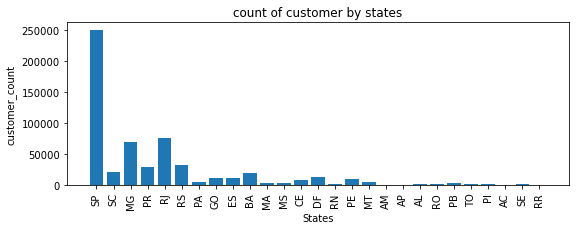

In [5]:
query = """Select customers.customer_state as State , count(customer_id) as customers from customers
group by State  """

cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["State" , "Customer_Count"])
df
plt.figure(figsize= (9,3))
plt.bar(df["State"] , df["Customer_Count"])
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("customer_count")
plt.title("count of customer by states")
plt.show()

In [6]:
df

,State,Customer_Count
0,SP,250476
1,SC,21822
2,MG,69810
3,PR,30270
4,RJ,77112
5,RS,32796
6,PA,5850
7,GO,12120
8,ES,12198
9,BA,20280


#  Calculate the number of orders per month in 2018.

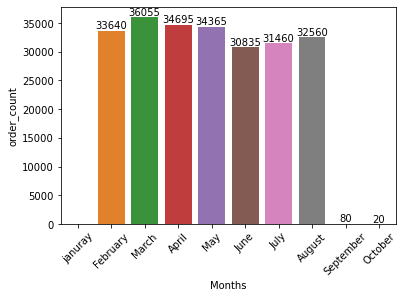

In [7]:
query = """Select MonthName(order_purchase_timestamp)as Months , count(order_id) as order_count
from orders  Where year(order_purchase_timestamp) = 2018 
group by Months """

cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data,columns = ["Months" , "order_count"])
o = ["januray","February","March","April","May","June","July","August","September","October"]
ax = sns.barplot(x = df["Months"], y=df["order_count"], data= df,order = o)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.show()



# Find the average number of products per order, grouped by customer city.

In [8]:
query = """with count_per_order  AS (select orders.order_id , orders.customer_id , Count(order_items.order_id) as Order_count
from orders join order_items 
on orders.order_id = order_items.order_id 
group by orders.order_id , orders.customer_id )

select customers.customer_city , round(avg(count_per_order.Order_count),2) as Avg_orders 
from customers join count_per_order  
on customers.customer_id = count_per_order.customer_id 
group by  customers.customer_city order by Avg_orders desc ;"""

cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Customer_city" , "Average_Orders"])
df.head(10)


,Customer_city,Average_Orders
0,padre carvalho,70.00
1,celso ramos,65.00
2,datas,60.00
3,candido godoi,60.00
4,matias olimpio,50.00
5,cidelandia,40.00
6,curralinho,40.00
7,picarra,40.00
8,morro de sao paulo,40.00
9,teixeira soares,40.00


# Calculate the percentage of total revenue contributed by each product category

In [9]:
query = """Select upper(products.product_category) as category , round((sum(payments.payment_value)/(select sum(payment_value) from payments ))*100,2)as Sales from 
products join order_items on products.product_id = order_items.product_id join 
payments on payments.order_id = order_items.order_id 
group by category ;"""

cursor.execute(query)

data= cursor.fetchall()
df = pd.DataFrame(data , columns = ["Category", "Percentage"])
df.head(5)

,Category,Percentage
0,SPORT LEISURE,86.96
1,HOME APPLIANCES,5.97
2,FURNITURE OFFICE,40.40
3,COOL STUFF,48.70
4,BED TABLE BATH,106.98


# Identify the correlation between product price and the number of times a product has been purchased.

In [10]:
import numpy as np 
query = """Select products.product_category , count(order_items.product_id) , round(avg(order_items.price),2) as Average 
from products join order_items on 
products.product_id = order_items.product_id 
group by  products.product_category;"""

cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data , columns = ["Category" , "Count" , "Average"])
arr1 = df["Count"]
arr2 = df["Average"]

a = np.corrcoef([arr1,arr2])
print("The Correlation between two variables Count and Average is -  " , a[0][-1])

The Correlation between two variables Count and Average is -   -0.10631514167157564


# Calculate the total revenue generated by each seller, and rank them by revenue.

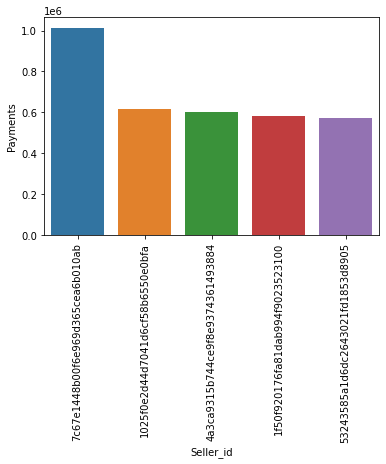

In [12]:
query = """ Select * , dense_rank() over(order by Revenue desc) as rn from 
(Select order_items.seller_id as Seller , sum(payments.payment_value) Revenue 
from order_items join payments on order_items.order_id = payments.order_id 
group by Seller) as a """

cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data , columns = ["Seller_id" , "Payments", "Rank"])
df = df.head()
sns.barplot(x ="Seller_id", y= "Payments", data =df)
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [13]:
query = """select customer_id , order_purchase_timestamp , payment , 
avg(payment) over(partition by customer_id order by order_purchase_timestamp 
rows between 2 preceding and current row )as mov_avg 
from
(select orders.customer_id , orders.order_purchase_timestamp ,payments.payment_value as payment
from payments join orders on payments.order_id = orders.order_id ) as a ;"""


cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Customer_id", "Order_purchase_timestamp", "Payment" , "Moving_Average"])
df

,Customer_id,Order_purchase_timestamp,Payment,Moving_Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
519425,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
519426,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
519427,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
519428,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# calculate the cumulative sales per month for each year.

In [16]:
query = """select Years , Months , payment, round(Sum(payment) over(order by Years, Months ),2)cumulative_sales from
(Select year(orders.order_purchase_timestamp) as Years, 
Month(orders.order_purchase_timestamp)as Months, 
round(sum(payments.payment_value),2) as payment from 
payments join orders on payments.order_id = orders.order_id 
group by Years, Months order by Years,Months ) as A
;"""


cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Years", "Months", "Payment" , "Cumulative_sales"])
df

,Years,Months,Payment,Cumulative_sales
0,2016,9,1261.20,1261.20
1,2016,10,295452.40,296713.60
2,2016,12,98.10,296811.70
3,2017,1,692440.20,989251.90
4,2017,2,1459540.05,2448791.95
5,2017,3,2249318.00,4698109.95
6,2017,4,2088940.15,6787050.10
7,2017,5,2964594.10,9751644.20
8,2017,6,2556381.90,12308026.10
9,2017,7,2961914.60,15269940.70


# Calculate the year-over-year growth rate of total sales.

In [19]:
query = """with A as(Select year(orders.order_purchase_timestamp) as Years, 
round(sum(payments.payment_value),2) as payment from 
payments join orders on payments.order_id = orders.order_id 
group by Years order by Years)

Select Years , ((payment-lag(payment , 1) over(order by Years))/lag(payment , 1) over(order by Years))*100 Sales_growth from A;
"""

cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Years","Sales_growth_%"])
df

,Years,Sales_growth_%
0,2016,NaN
1,2017,12112.703758
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [21]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cursor.execute(query)
data = cursor.fetchall()

data

[(None,)]

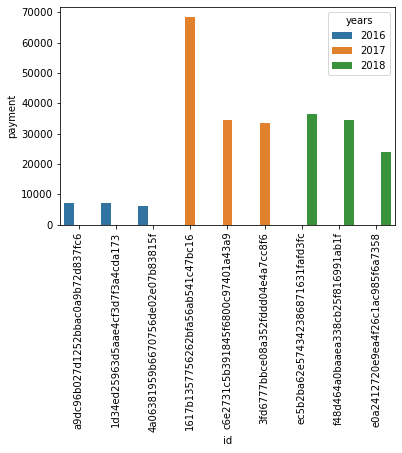

In [22]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()